<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data-Exploratory" data-toc-modified-id="Data-Exploratory-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploratory</a></span></li><li><span><a href="#Flatten-and-Standardize-the-dataset" data-toc-modified-id="Flatten-and-Standardize-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Flatten and Standardize the dataset</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PCA</a></span></li></ul></div>

# Data Exploratory 

**Load the data using xarray**

In [1]:
import xarray as xr

In [2]:
access_pr_file = '/home/abanihi/devel/deepclimate/deepclimate-rd/sample_aos_data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'

In [3]:
dset = xr.open_dataset(access_pr_file)

In [4]:
dset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 60)
Coordinates:
  * lon        (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * time       (time) datetime64[ns] 2001-01-16T12:00:00 2001-02-15 ...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) float64 ...
    pr         (time, lat, lon) float64 ...
Attributes:
    CDI:                    Climate Data Interface version 1.7.1 (http://mpim...
    Conventions:            CF-1.4
    history:                Fri Dec  8 10:05:47 2017: ncatted -O -a history,p...
    source:                 ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          historical
    model_id:        

**convert precipitation units to mm/day**


To do this, consider that 1 kg of rain water spread over 1 m2 of surface is 1 mm in thickness and that there are 86400 seconds in one day. Therefore, 1 kg m-2 s-1 = 86400 mm day-1.

In [5]:
pr = dset['pr'] * 86400
pr

<xarray.DataArray 'pr' (time: 60, lat: 145, lon: 192)>
array([[[0.19356 , 0.19356 , ..., 0.193565, 0.193565],
        [0.144753, 0.145445, ..., 0.143843, 0.144203],
        ...,
        [0.234199, 0.224581, ..., 0.243426, 0.23944 ],
        [0.193997, 0.193997, ..., 0.193997, 0.193997]],

       [[0.407444, 0.407444, ..., 0.407334, 0.407334],
        [0.357676, 0.355279, ..., 0.362809, 0.360405],
        ...,
        [0.541897, 0.545767, ..., 0.537055, 0.53841 ],
        [0.548726, 0.548726, ..., 0.548726, 0.548726]],

       ...,

       [[0.22288 , 0.22288 , ..., 0.222746, 0.222746],
        [0.198965, 0.197357, ..., 0.202459, 0.201638],
        ...,
        [1.108785, 1.101874, ..., 1.127764, 1.119411],
        [0.899674, 0.899674, ..., 0.899674, 0.899674]],

       [[0.120204, 0.120204, ..., 0.120176, 0.120176],
        [0.077715, 0.077859, ..., 0.077662, 0.077223],
        ...,
        [0.641761, 0.651492, ..., 0.628137, 0.637484],
        [0.578696, 0.578696, ..., 0.578696, 0.578

** visualization**

In [6]:
import geoviews as gv
import holoviews as hv
from cartopy import crs
import geoviews.feature as gf
hv.notebook_extension()
%output size=200
%opts Image {+framewise} [colorbar=True] Curve [xrotation=60]

In [7]:
sample_pr = pr.isel(time=slice(0, 5))
sample_pr

<xarray.DataArray 'pr' (time: 5, lat: 145, lon: 192)>
array([[[0.19356 , 0.19356 , ..., 0.193565, 0.193565],
        [0.144753, 0.145445, ..., 0.143843, 0.144203],
        ...,
        [0.234199, 0.224581, ..., 0.243426, 0.23944 ],
        [0.193997, 0.193997, ..., 0.193997, 0.193997]],

       [[0.407444, 0.407444, ..., 0.407334, 0.407334],
        [0.357676, 0.355279, ..., 0.362809, 0.360405],
        ...,
        [0.541897, 0.545767, ..., 0.537055, 0.53841 ],
        [0.548726, 0.548726, ..., 0.548726, 0.548726]],

       ...,

       [[0.119035, 0.119035, ..., 0.119003, 0.119003],
        [0.136347, 0.137015, ..., 0.137441, 0.136439],
        ...,
        [0.448225, 0.439135, ..., 0.451546, 0.44985 ],
        [0.365161, 0.365161, ..., 0.365161, 0.365161]],

       [[0.175229, 0.175229, ..., 0.175219, 0.175219],
        [0.142456, 0.142918, ..., 0.142247, 0.142435],
        ...,
        [0.205651, 0.205105, ..., 0.210547, 0.206444],
        [0.141384, 0.141384, ..., 0.141384, 0.1413

In [8]:
dataset = gv.Dataset(sample_pr, vdims='pr', crs=crs.PlateCarree())

In [9]:
dataset

:Dataset   [lon,lat,time]   (pr)

In [10]:
geo_dims = ['lon', 'lat']

:HoloMap   [time]
   :Image   [lon,lat]   (pr)
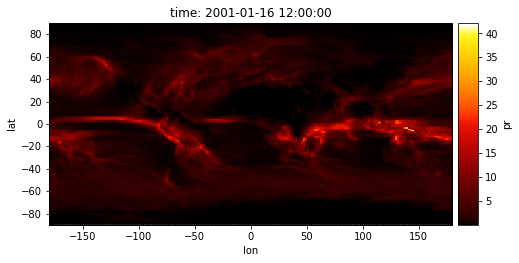
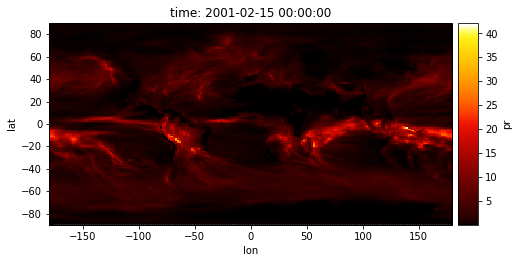
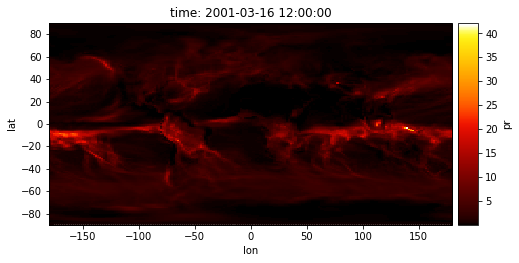
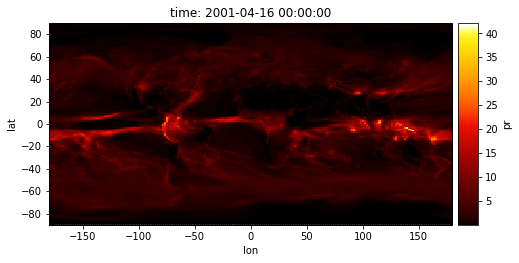
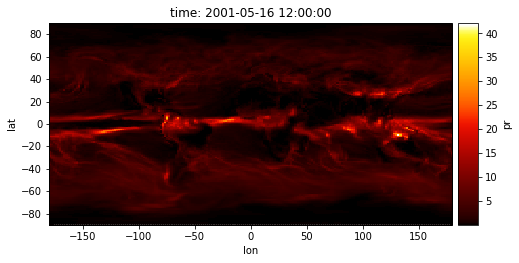

In [11]:
(dataset.to(gv.Image, geo_dims))

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (pr)
      .Coastline.I :Feature   [Longitude,Latitude]
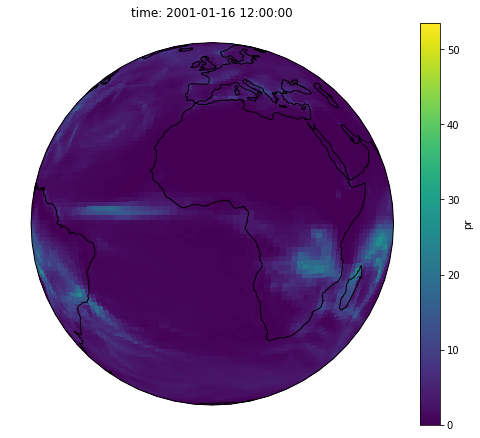
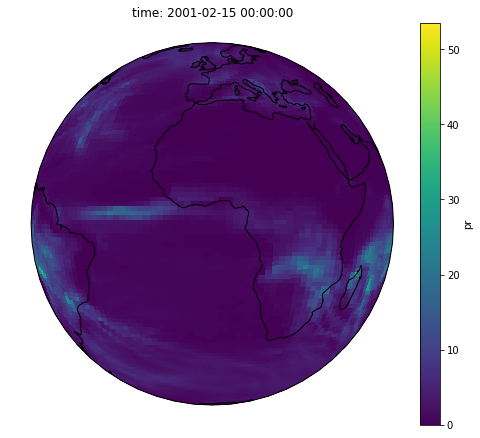
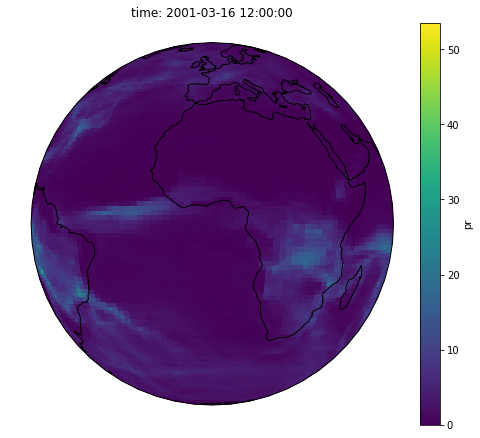
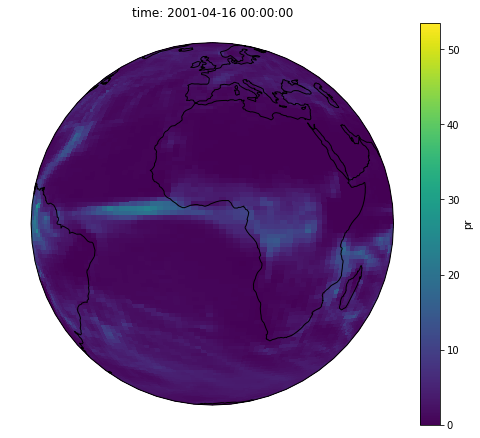
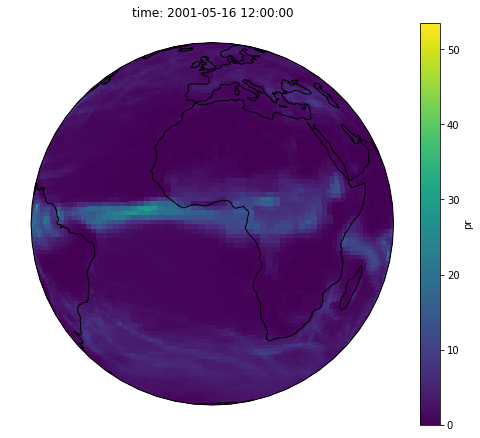

In [12]:
%%opts Image [projection=crs.Geostationary()] (cmap='viridis') Overlay [xaxis=None yaxis=None]
dataset.to.image(geo_dims) * gf.coastline

# Flatten and Standardize the dataset

In [13]:
data = pr.values

In [14]:
data.shape

(60, 145, 192)

In [15]:
from sklearn.preprocessing import scale
import numpy as np

In [16]:
data = data.reshape((len(data), np.prod(data.shape[1:])))

In [17]:
#scaled_data = scale(data)
scaled_data = data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test = train_test_split(scaled_data, test_size=0.3)

In [20]:
x_train.shape

(42, 27840)

In [21]:
x_test.shape

(18, 27840)

# PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=100)

In [24]:
encoded_imgs = pca.fit(x_train).transform(x_test)

In [25]:
decoded_imgs = pca.inverse_transform(encoded_imgs)

In [26]:
encoded_imgs.shape

(18, 42)

In [27]:
decoded_imgs.shape

(18, 27840)

In [28]:
indices = [i for i in range(len(x_test))]

In [29]:
indices = np.random.choice(len(x_test), 5)

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
n = len(indices)

In [32]:
indices

array([ 9, 11,  6,  8, 15])

In [33]:
fig = plt.figure(figsize=(30, 20))

In [34]:
rows = 3
side1 = 6
side2 = 7

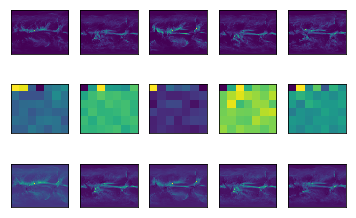

In [35]:
for i in range(n):
    ax = plt.subplot(rows, n, i + 1)
    plt.imshow(x_test[indices[i]].reshape(145, 192))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoding
    ax = plt.subplot(rows, n, i +1 + n)
    plt.imshow(((encoded_imgs[indices[i]] + 1) / 2).reshape(side1, side2))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(rows, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[indices[i]].reshape(145, 192))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse = mean_squared_error(x_test, decoded_imgs)
print(mse)

2.5716447303845693


In [38]:
%load_ext version_information
%version_information sklearn, numpy, matplotlib, xarray

Software versions
Python 3.6.4 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
sklearn 0.19.1
numpy 1.14.0
matplotlib 2.1.2
xarray 0.10.0
Thu Jan 25 10:20:37 2018 CST